# Mental Navigation Primate PPC Data Exploration Notebook

**IMPORTANT:** This notebook was **AI-generated using dandi-notebook-gen** and has **not been fully verified**. Please exercise caution when interpreting the results or code, and thoroughly review all analyses before drawing scientific conclusions.

This notebook helps researchers get started analyzing **DANDI:001275 - Mental navigation primate PPC Neupane_Fiete_Jazayeri**.

---

### Dandiset Description
This dataset contains neurophysiology data collected from two primates performing a mental navigation task. The animal is shown a start and target landmark, then — after a delay — must use a joystick to 'navigate' mentally from start to target. All intervening landmarks and visual cues are occluded during the navigation phase, prompting internal computation.

Data includes extracellular electrophysiology, behavioral and eye tracking, and spike sorting.

Publication: https://doi.org/10.1038/s41586-024-07557-z

### Techniques included
- Multi-electrode extracellular recordings
- Spike sorting
- Behavioral task with joystick response

---

### Package requirements
This notebook requires the following packages:
- `pynwb`
- `lindi`
- `dandi`
- `numpy`
- `matplotlib`

Please install these via pip if needed.

---

### Summary of contents
- Metadata exploration via DANDI API
- Accessing NWB file and exploring trial, behavioral, and spike data
- Visualizations of behavioral outcomes and neural data properties
- Example code snippets for further analysis

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())
print(f"Total assets found: {len(assets)}")

for a in assets[:5]:
    print(f"Asset: {a.path}, size (bytes): {a.size}")

Total assets found: 20
Asset: sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb, size (bytes): 368370630
Asset: sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb, size (bytes): 453971245
Asset: sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb, size (bytes): 553770495
Asset: sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb, size (bytes): 590703881
Asset: sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb, size (bytes): 563225479


We will focus on this NWB file from subject 'amadeus', session 2020-01-04:
`sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb`

You can swap in other files similarly if desired.

In [2]:
import pynwb
import lindi

# Load the NWB file with Lindi for efficient access
lf = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001275/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/nwb.lindi.json"
)
nwb = pynwb.NWBHDF5IO(file=lf, mode="r").read()

print("Session description:", nwb.session_description)
print("Experiment date:", nwb.session_start_time)
print("Subject ID:", nwb.subject.subject_id)
print("Species:", nwb.subject.species)
print("Institution:", nwb.institution)
print("Lab:", nwb.lab)
print("Total trials:", len(nwb.intervals['trials']['id']))
print("Total units:", len(nwb.processing['ecephys']['units']['id'].data))
print("Total electrodes:", len(nwb.electrodes['id'].data))

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Experiment date: 2020-01-04 00:00:00-05:00
Subject ID: amadeus
Species: Macaca mulatta
Institution: MIT
Lab: Jazayeri, Fiete
Total trials: 1885
Total units: 68
Total electrodes: 32


## Trial Data Overview
The dataset contains 1885 trials. Below is a distribution of successful (1) versus failed (0) trials, showing more successes overall.

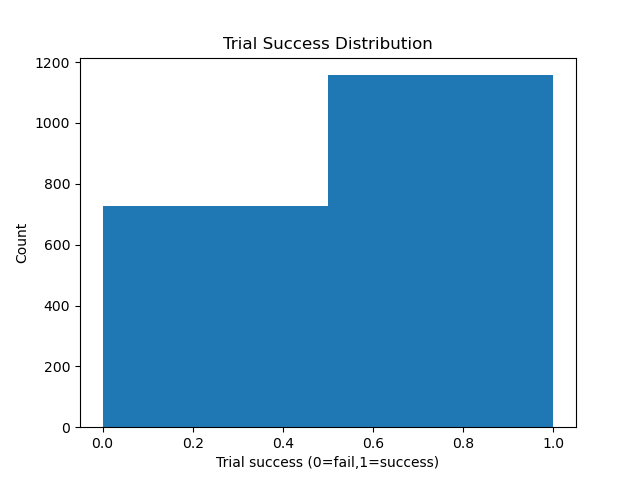

In [3]:
import matplotlib.pyplot as plt
import numpy as np

succ = nwb.intervals["trials"]["succ"][:]
plt.figure()
plt.hist(succ, bins=2)
plt.xlabel("Trial success (0=fail,1=success)")
plt.ylabel("Count")
plt.title("Trial Success Distribution")
plt.savefig("tmp_scripts/trial_success.png")
plt.close()

from IPython.display import Image
Image("tmp_scripts/trial_success.png")

Approximately **1150 trials** were successful, and **around 735 failures**, corresponding to a skew favoring successful outcomes.

## Reaction Time Distribution
The reaction times are mostly under 20 seconds, but a small number reach above 100 seconds, forming a long right tail.

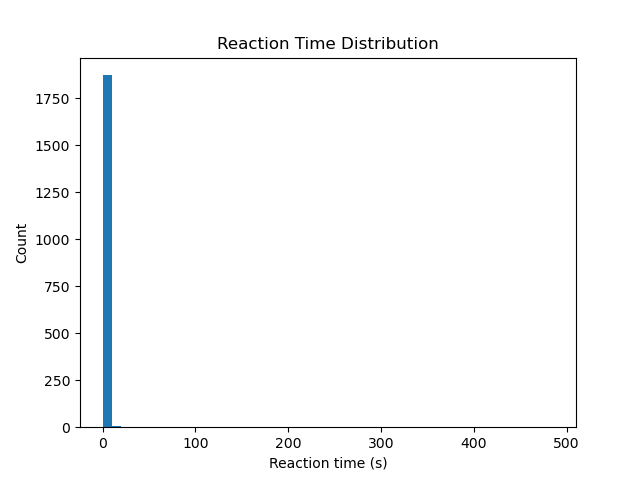

In [4]:
rt = nwb.intervals["trials"]["rt"][:]
plt.figure()
plt.hist(rt, bins=50)
plt.xlabel("Reaction time (s)")
plt.ylabel("Count")
plt.title("Reaction Time Distribution")
plt.savefig("tmp_scripts/reaction_time.png")
plt.close()

Image("tmp_scripts/reaction_time.png")

The majority of trials feature **rapid responses under ~20 seconds**, with a few longer duration trials up to 500 seconds, likely representing rare slow responses or outlier behaviors.

## Spike Data Overview
There are 68 sorted units. Below is spike count distribution per unit.

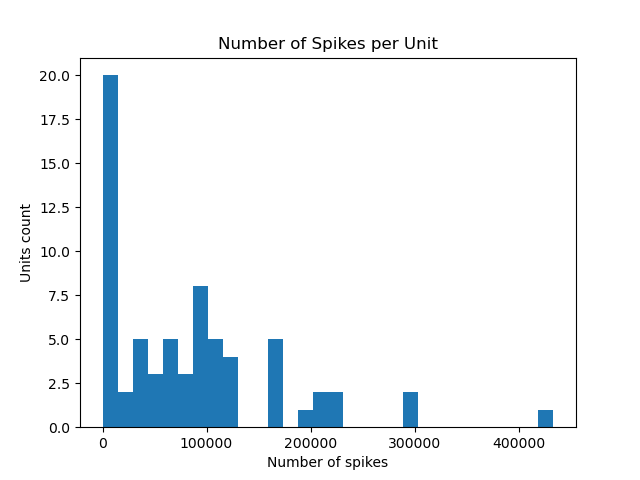

In [5]:
n_spikes = nwb.processing["ecephys"]["units"]["n_spikes"].data[:]
plt.figure()
plt.hist(n_spikes, bins=30)
plt.xlabel("Number of spikes")
plt.ylabel("Units count")
plt.title("Number of Spikes per Unit")
plt.savefig("tmp_scripts/n_spikes_per_unit.png")
plt.close()
Image("tmp_scripts/n_spikes_per_unit.png")

Most units have under **50,000 spikes**, with a few units exceeding **200,000+** spikes, capturing broad firing variability across neurons.

## Depth Distribution of Units
The histogram below illustrates recording depths (microns) for these 68 units, with two apparent clusters.

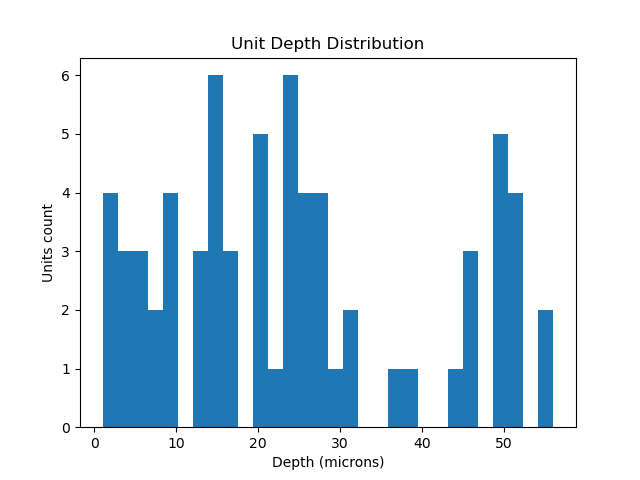

In [6]:
depths = nwb.processing["ecephys"]["units"]["depth"].data[:]
plt.figure()
plt.hist(depths, bins=30)
plt.xlabel("Depth (microns)")
plt.ylabel("Units count")
plt.title("Unit Depth Distribution")
plt.savefig("tmp_scripts/unit_depths.png")
plt.close()
Image("tmp_scripts/unit_depths.png")

The unit depths range from 0 to ~55 microns, with apparent clusters near **5–20 μm** and **45–50 μm**, perhaps indicating laminar arrangement or probe location patterns.

## Electrode Geometry
Finally, the relative electrode locations plotted below adhere closely to a 1D vertical linear probe shank.

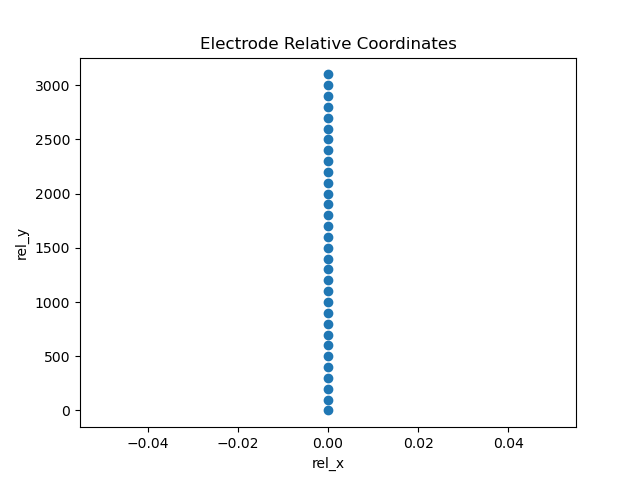

In [7]:
rel_x = nwb.electrodes["rel_x"].data[:]
rel_y = nwb.electrodes["rel_y"].data[:]
plt.figure()
plt.scatter(rel_x, rel_y)
plt.xlabel("rel_x")
plt.ylabel("rel_y")
plt.title("Electrode Relative Coordinates")
plt.savefig("tmp_scripts/electrode_locations.png")
plt.close()
Image("tmp_scripts/electrode_locations.png")

The electrode array is aligned along a single vertical line, characteristic of a linear multichannel probe, sampling across cortical depths.

# Summary
This notebook provided an overview of Dandiset 001275 with interactive exploration of trial outcomes, reaction times, spike data, unit depths, and electrode geometry.

**NOTE:** This notebook and analyses were generated by an AI tool automatically and have not been manually curated or validated. Be cautious interpreting the plots or code and consider this notebook a starting point for your own deeper investigations.